In [8]:
from tensorflow.keras.models import model_from_json
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [9]:
def get_model(mdl, weights, path_mdl, path_weights, loss='binary_crossentropy'):
    json_file = open(path_mdl+mdl, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(path_weights+weights)
    loaded_model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    return loaded_model

In [10]:
mdl = get_model('model_rsna.json',
                'model.h5',
                'medical_cases_recognition/models/',
                'medical_cases_recognition/weights/',
                loss='categorical_crossentropy'
               )

In [24]:
img = img_to_array(load_img('/home/yaroslav/Downloads/rsna_data/output/stage_2_train/ID_408033a72.png',
                            target_size=(224, 224)))
img = np.expand_dims(img, axis=0)

In [25]:
from skimage.io import imshow

/home/yaroslav/projects/MedicalAI/venv/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


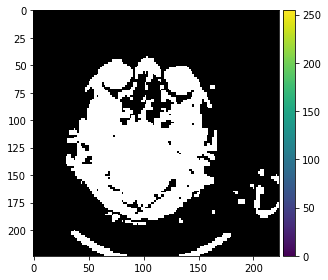

In [26]:
imshow(img[0]);

In [28]:
mdl.predict(img)

array([[0., 0., 0., 0., 0., 0.]], dtype=float32)